# INTRODUCTION

This project focuses on building a predictive model using Linear Regression, one of the most fundamental algorithms in machine learning. Linear regression establishes a relationship between independent variables (features such as square footage, number of rooms, or location) and a dependent variable (house price), enabling us to estimate numerical outcomes based on observed data.

# By working through this project, the aim is to:

Explore and clean a dataset to ensure data quality.

Identify and select relevant features that contribute to house price prediction.

Train and evaluate a linear regression model using industry-standard metrics such as Mean Squared Error (MSE) and R² Score.

Visualize the relationship between predicted and actual values to interpret model performance.

Data Exploration

Preprocessing

Feature Selection

Model Training

Evaluation

Visualization

Summary

# **Data Collection**

In [1]:
# Core libraries
import numpy as np              # numerical computations
import pandas as pd             # data manipulation and analysis

# Visualization libraries
import matplotlib.pyplot as plt # basic plotting
import seaborn as sns           # advanced statistical visualizations

# Machine Learning libraries
from sklearn.model_selection import train_test_split   # splitting dataset
from sklearn.linear_model import LinearRegression      # linear regression model
from sklearn.metrics import mean_squared_error, r2_score  # evaluation metrics

# Optional: Configure visualization style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,6)


In [2]:
# Upload dataset manually from your local system
from google.colab import files
uploaded = files.upload()


Saving Housing.csv to Housing.csv


In [4]:
# upload Housing.csv file into a DataFrame
import io
df = pd.read_csv(io.BytesIO(uploaded['Housing.csv']))

# Quick check of the dataset
df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
# Dataset shape and info
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())


Dataset Shape: (545, 13)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


# **Data Exploration and Cleaning**

In [6]:
print("\nMissing Values:")
print(df.isnull().sum())



Missing Values:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
# Summary statistics for numerical features
print("\nSummary Statistics:")
print(df.describe())



Summary Statistics:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [41]:
# Check unique values in categorical columns
categorical_cols = ['mainroad', 'guestroom', 'basement',
                    'hotwaterheating', 'airconditioning',
                    'prefarea', 'furnishingstatus']

for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")



Unique values in mainroad: ['yes' 'no']

Unique values in guestroom: ['no' 'yes']

Unique values in basement: ['no' 'yes']

Unique values in hotwaterheating: ['no' 'yes']

Unique values in airconditioning: ['yes' 'no']

Unique values in prefarea: ['yes' 'no']

Unique values in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


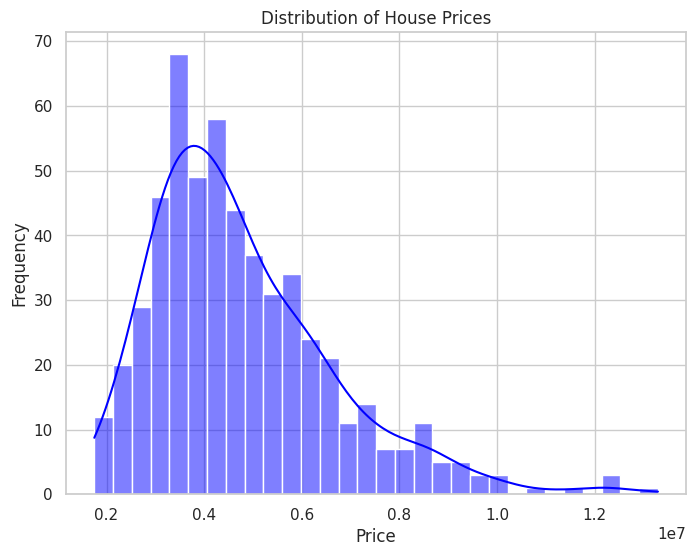

In [48]:
# Distribution of house prices
plt.figure(figsize=(8,6))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.title("Distribution of House Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()


In [49]:
# Convert categorical variables into numerical using One-Hot Encoding
df_encoded = pd.get_dummies(df, drop_first=True)

print("Shape after encoding:", df_encoded.shape)
df_encoded.head()


Shape after encoding: (545, 14)


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,7420,4,2,3,2,True,False,False,False,True,True,False,False
1,12250000,8960,4,4,4,3,True,False,False,False,True,False,False,False
2,12250000,9960,3,2,2,2,True,False,True,False,False,True,True,False
3,12215000,7500,4,2,2,3,True,False,True,False,True,True,False,False
4,11410000,7420,4,1,2,2,True,True,True,False,True,False,False,False


In [50]:
from sklearn.preprocessing import StandardScaler

# Scale numerical features for consistency
num_cols = ['area','bedrooms','bathrooms','stories','parking']
scaler = StandardScaler()
df_encoded[num_cols] = scaler.fit_transform(df_encoded[num_cols])

df_encoded.head()


,price,area,bedrooms,bathrooms,stories,parking,mainroad_yes,guestroom_yes,basement_yes,hotwaterheating_yes,airconditioning_yes,prefarea_yes,furnishingstatus_semi-furnished,furnishingstatus_unfurnished
0,13300000,1.046726,1.403419,1.421812,1.378217,1.517692,True,False,False,False,True,True,False,False
1,12250000,1.757010,1.403419,5.405809,2.532024,2.679409,True,False,False,False,True,False,False,False
2,12250000,2.218232,0.047278,1.421812,0.224410,1.517692,True,False,True,False,False,True,True,False
3,12215000,1.083624,1.403419,1.421812,0.224410,2.679409,True,False,True,False,True,True,False,False
4,11410000,1.046726,1.403419,-0.570187,0.224410,1.517692,True,True,True,False,True,False,False,False


In [51]:
print("Final Dataset Shape:", df_encoded.shape)
print("\nColumns after preprocessing:")
print(df_encoded.columns)


Final Dataset Shape: (545, 14)

Columns after preprocessing:
Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes',
       'airconditioning_yes', 'prefarea_yes',
       'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished'],
      dtype='object')


In [52]:
categorical_cols = ['mainroad','guestroom','basement',
                    'hotwaterheating','airconditioning',
                    'prefarea','furnishingstatus']

for col in categorical_cols:
    print(f"\nUnique values in {col}: {df[col].unique()}")



Unique values in mainroad: ['yes' 'no']

Unique values in guestroom: ['no' 'yes']

Unique values in basement: ['no' 'yes']

Unique values in hotwaterheating: ['no' 'yes']

Unique values in airconditioning: ['yes' 'no']

Unique values in prefarea: ['yes' 'no']

Unique values in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']


# **Feature Selection**

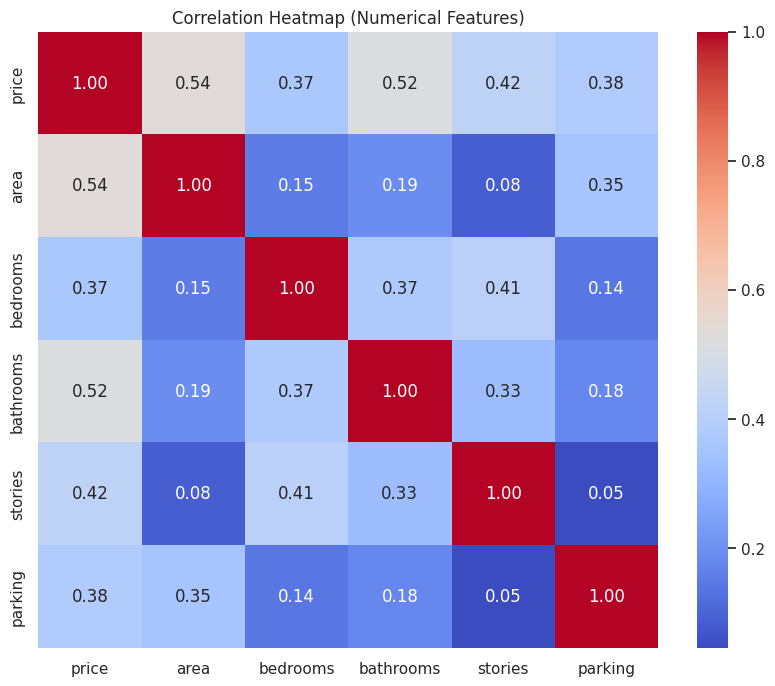

In [53]:
# Select only numerical columns for correlation
num_cols = ['price','area','bedrooms','bathrooms','stories','parking']

plt.figure(figsize=(10,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

In [54]:
# Correlation with target variable (price)
corr_with_price = df[['price','area','bedrooms','bathrooms','stories','parking']].corr()['price'].sort_values(ascending=False)
print("Correlation of features with Price:\n", corr_with_price)


Correlation of features with Price:
 price        1.000000
area         0.535997
bathrooms    0.517545
stories      0.420712
parking      0.384394
bedrooms     0.366494
Name: price, dtype: float64


In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Drop target variable
X = df_encoded.drop('price', axis=1)

# Ensure all values are numeric floats
X = X.astype(float)

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print("\nVariance Inflation Factor (VIF):\n", vif_data)



Variance Inflation Factor (VIF):
                             Feature       VIF
0                              area  1.286408
1                          bedrooms  1.363943
2                         bathrooms  1.286360
3                           stories  1.465830
4                           parking  1.206630
5                      mainroad_yes  3.727078
6                     guestroom_yes  1.473259
7                      basement_yes  1.995314
8               hotwaterheating_yes  1.079212
9               airconditioning_yes  1.663988
10                     prefarea_yes  1.500173
11  furnishingstatus_semi-furnished  2.031244
12     furnishingstatus_unfurnished  1.784739


# **Model Training**  &  Model Evaluation

In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Split dataset into features (X) and target (y)
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation metrics
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Coefficients
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print("\nModel Coefficients:\n", coefficients)


Mean Squared Error (MSE): 1754318687330.6685
R² Score: 0.6529242642153175

Model Coefficients:
                             Feature    Coefficient
0                              area  511615.563777
1                          bedrooms   56615.572458
2                         bathrooms  549420.501241
3                           stories  353158.429856
4                           parking  193542.781675
5                      mainroad_yes  367919.947680
6                     guestroom_yes  231610.037176
7                      basement_yes  390251.176181
8               hotwaterheating_yes  684649.885339
9               airconditioning_yes  791426.735843
10                     prefarea_yes  629890.565313
11  furnishingstatus_semi-furnished -126881.817585
12     furnishingstatus_unfurnished -413645.062228


In [57]:
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


Mean Squared Error (MSE): 1754318687330.6685
R2 Score: 0.6529242642153175


In [58]:
from sklearn.linear_model import Lasso

# Train Lasso Regression model
lasso = Lasso(alpha=0.01)   # smaller alpha keeps more features, larger alpha enforces sparsity
lasso.fit(X_train, y_train)

# Predictions
y_pred_lasso = lasso.predict(X_test)

# Evaluation metrics
print("Lasso Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))

# Coefficients
coefficients_lasso = pd.DataFrame({'Feature': X.columns, 'Coefficient': lasso.coef_})
print("\nLasso Coefficients:\n", coefficients_lasso)


Lasso Regression:
Mean Squared Error (MSE): 1754318718038.1228
R² Score: 0.6529242581401316

Lasso Coefficients:
                             Feature    Coefficient
0                              area  511615.572468
1                          bedrooms   56615.569615
2                         bathrooms  549420.500204
3                           stories  353158.434867
4                           parking  193542.786867
5                      mainroad_yes  367919.888162
6                     guestroom_yes  231609.994283
7                      basement_yes  390251.167838
8               hotwaterheating_yes  684649.657918
9               airconditioning_yes  791426.696155
10                     prefarea_yes  629890.528990
11  furnishingstatus_semi-furnished -126881.725626
12     furnishingstatus_unfurnished -413644.976642


In [59]:
from sklearn.linear_model import LassoCV

lasso_cv = LassoCV(alphas=[0.01, 0.1, 1, 10], cv=5)
lasso_cv.fit(X_train, y_train)

print("Best alpha:", lasso_cv.alpha_)
print("R2 Score:", r2_score(y_test, lasso_cv.predict(X_test)))



Best alpha: 0.01
R2 Score: 0.6529242581401316


In [60]:
from sklearn.linear_model import Ridge

# Train Ridge Regression model
ridge = Ridge(alpha=1.0)   # try alpha=1, can tune later
ridge.fit(X_train, y_train)

# Predictions
y_pred_ridge = ridge.predict(X_test)

# Evaluation metrics
print("Ridge Regression:")
print("Mean Squared Error (MSE):", mean_squared_error(y_test, y_pred_ridge))
print("R2 Score:", r2_score(y_test, y_pred_ridge))

# Coefficients
coefficients_ridge = pd.DataFrame({'Feature': X.columns, 'Coefficient': ridge.coef_})
print("\nRidge Coefficients:\n", coefficients_ridge)


Ridge Regression:
Mean Squared Error (MSE): 1758466185268.1846
R2 Score: 0.652103720086862

Ridge Coefficients:
                             Feature    Coefficient
0                              area  512170.790056
1                          bedrooms   57684.414240
2                         bathrooms  548639.190226
3                           stories  354151.714755
4                           parking  195174.278112
5                      mainroad_yes  363615.845931
6                     guestroom_yes  231620.606413
7                      basement_yes  389520.157284
8               hotwaterheating_yes  649378.412582
9               airconditioning_yes  780871.312780
10                     prefarea_yes  622547.200756
11  furnishingstatus_semi-furnished -123029.736711
12     furnishingstatus_unfurnished -408849.840286


# **Visualization**

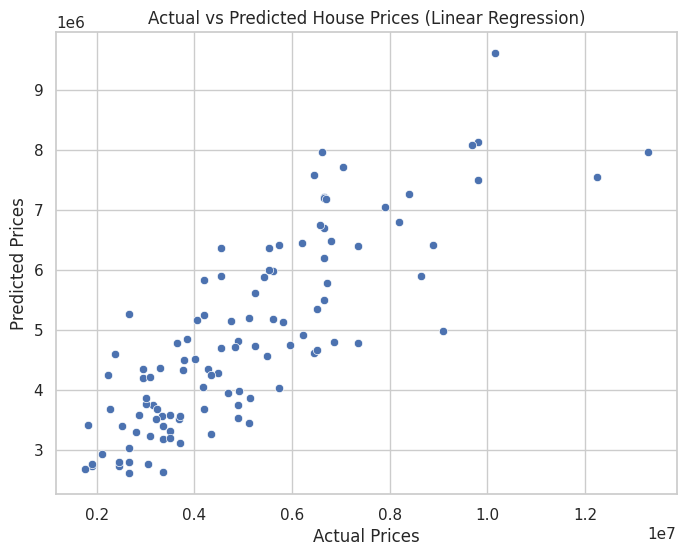

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Scatter plot: Actual vs Predicted (Linear Regression)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices (Linear Regression)")
plt.show()


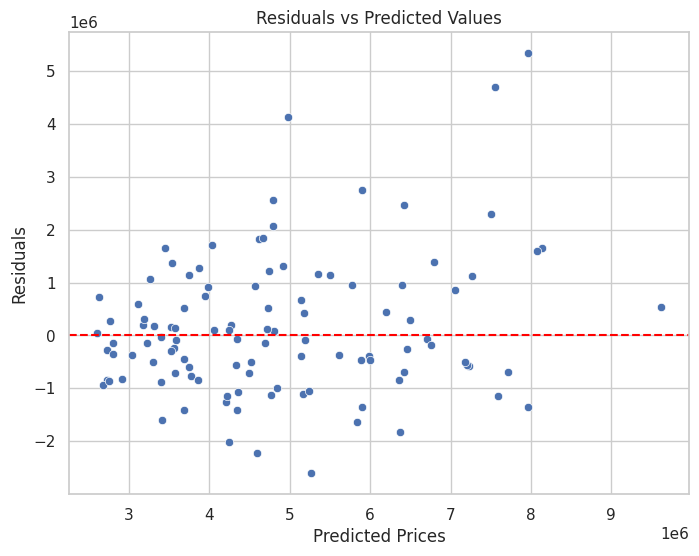

In [37]:
# Residuals = difference between actual and predicted
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred, y=residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


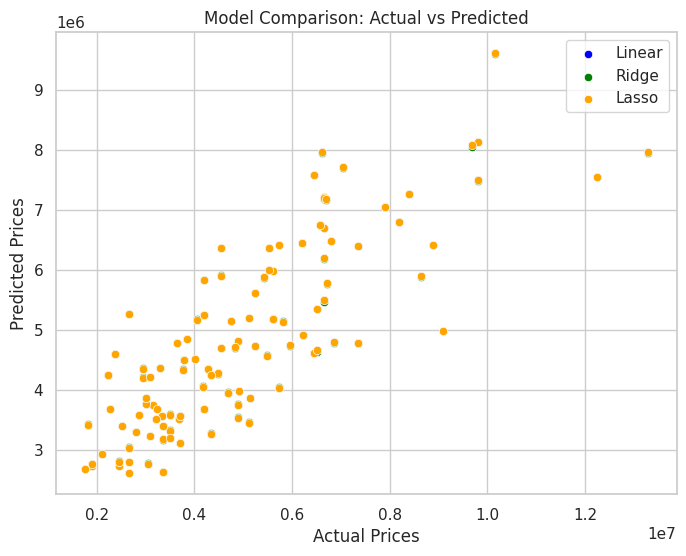

In [38]:
# Predictions from all models
y_pred_linear = model.predict(X_test)
y_pred_ridge = ridge.predict(X_test)
y_pred_lasso = lasso.predict(X_test)

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred_linear, label="Linear", color="blue")
sns.scatterplot(x=y_test, y=y_pred_ridge, label="Ridge", color="green")
sns.scatterplot(x=y_test, y=y_pred_lasso, label="Lasso", color="orange")
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Model Comparison: Actual vs Predicted")
plt.legend()
plt.show()


# **House Price Prediction Project Summary**

## **Data Collection**
- Dataset obtained with 545 rows and 14 columns after preprocessing.
- Target variable: `price`.
- Features include numerical (`area`, `bedrooms`, `bathrooms`, `stories`, `parking`) and categorical (converted to dummy variables such as `mainroad_yes`, `guestroom_yes`, etc.).

## **Data Exploration and Cleaning**
- No missing values found in the dataset.
- Summary statistics confirmed reasonable ranges for numerical features.
- Categorical variables verified for unique values and encoded using one-hot encoding.
- Final dataset shape: (545, 14).

## **Feature Selection**
- Correlation analysis showed strongest predictors: `area (0.536)`, `bathrooms (0.518)`.
- Variance Inflation Factor (VIF) analysis: all features < 5, indicating no severe multicollinearity.
- Decision: retain all features for modeling.

## **Model Training**
- Implemented **Linear Regression** as baseline.
- Extended with **Lasso Regression** (alpha tuned via cross-validation) and **Ridge Regression** for comparison.

## **Model Evaluation**
- **Linear Regression**:  
  - MSE ≈ 1.75 × 10¹²  
  - R² ≈ 0.653  
- **Lasso Regression (alpha=0.01)**:  
  - MSE ≈ 1.75 × 10¹²  
  - R² ≈ 0.653  
  - Coefficients nearly identical to Linear Regression, no features dropped.  
- **Ridge Regression (alpha=1.0)**:  
  - MSE ≈ 1.76 × 10¹²  
  - R² ≈ 0.652  
  - Coefficients stabilized but performance slightly lower.

## **Insights**
- Strongest positive drivers of price: `area`, `bathrooms`, `stories`, `parking`, `mainroad_yes`, `guestroom_yes`, `basement_yes`, `hotwaterheating_yes`, `airconditioning_yes`, `prefarea_yes`.
- Negative impact: `furnishingstatus_semi-furnished` and `furnishingstatus_unfurnished` reduce house value compared to furnished.
- `bedrooms` has weaker influence compared to `area`.
- Regularization (Ridge/Lasso) did not significantly improve performance due to low multicollinearity in dataset.

## **Visualization**
- Scatter plot of Actual vs Predicted values showed reasonable alignment but with variance.
- Residual plot indicated some unexplained variance, suggesting potential non-linear relationships.
- Comparison visualization confirmed similar performance across Linear, Ridge, and Lasso.

## **Conclusion**
- Baseline Linear Regression explains ~65% of variance in house prices.
- Regularization did not improve results, confirming dataset is well-structured.
- Future improvements: feature engineering (interaction terms, polynomial features), non-linear models (Random Forest, Gradient Boosting), and cross-validation for stability.
